# Bit Error Rate in an AWGN Channel




In all digital modulation schemes, the bit error rate (BER) is an important metric. The BER is a direct measure of the possible data throughput under the given circumstances. That is, the smaller the BER, the better. In this post, we look at the effect of an additive white gaussian noise (AWGN) channel on the BER of some common modulation schemes.


## Additive White Gaussian Noise


A single sample of AWGN is a realisation of a random variable whose probability density function is a scaled standard normal distribution. Further, all AWGN samples are independent and identical, which is why their spectrum is uniform across all frequencies (hence the term "white"). Each sample of AWGN is modelled as directly being added to the signal of interest.


If the inputs to the channel are samples $X_i$, then the output $Y_i$ of the AWGN channel is represented by:

$$
{\displaystyle Y_{i}=X_{i}+Z_{i}\,\!}
$$

$$
Z_{i}\sim {\mathcal  {N}}(0,N)\,\!
$$

where $ Z_{i}$ is independent and identically distributed and drawn from a zero-mean normal distribution with variance $N$ (the noise). The $Z_{i}$ are further assumed to not be correlated with the $X_{i}$.

## Power of AWGN

The power of the real AWGN signal $Z_{i}$ is $N$. Complex AWGN may be thought of as two separate and uncorrelated streams of real AWGNs. So a complex AWGN signal $Z^c_{i}$ may be represented as:

$$
Z^c_{i} = Z^1_{i} + Z^2_{i}
$$

Where $ Z^1_{i}\sim {\mathcal  {N}}(0,N)\,\!$, $Z^2_{i}\sim {\mathcal  {N}}(0,N)\,\!$. They are independent and uncorrelated. Note that the power of $Z^c_{i}$ above is $2N$. 

Let us see how we can generate AWGN in python:


In [ ]:
# The below is a command to force the ipynb to plot inline instead of popping a window
%matplotlib inline
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import special

Mean Square Power =  0.9775509328221856


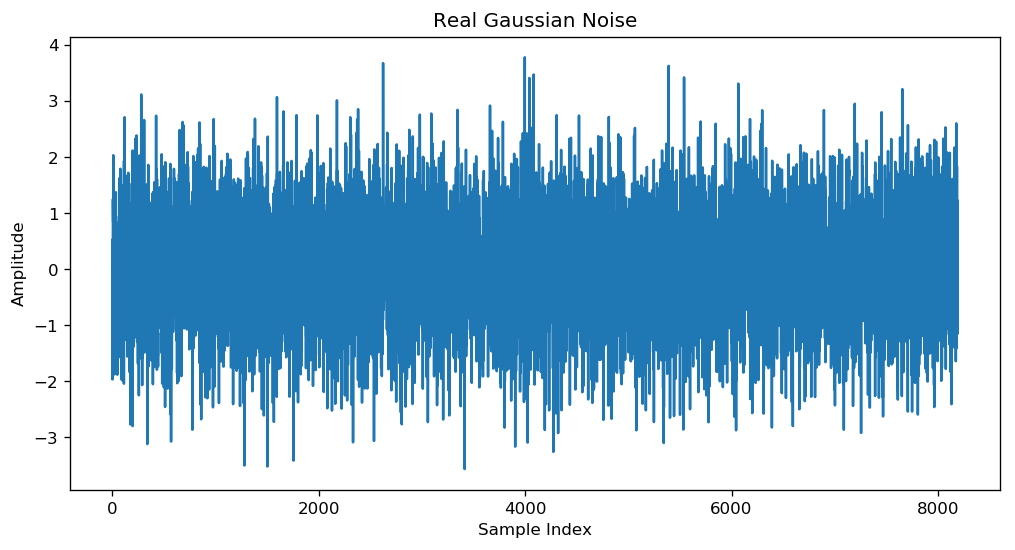

In [155]:
num_s = 8192; # Number of symbols

# The below command creates a num_s sized vector of samples drawn from a
# random normal distribution of variance 1.
z = np.random.normal(0,1,size=num_s);

# We'll look at the power of the signal and also plot it
power = (np.mean(np.abs(z**2))); # Mean Squared power
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(10, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.plot(z);
plt.ylabel('Amplitude');
plt.xlabel('Sample Index');
plt.title('Real Gaussian Noise');

Complex Gaussian noise is just two separate realizations of real Gaussian noise. We now look at how to generate complex gaussian noise:

Mean Square Power =  2.0063973266976856


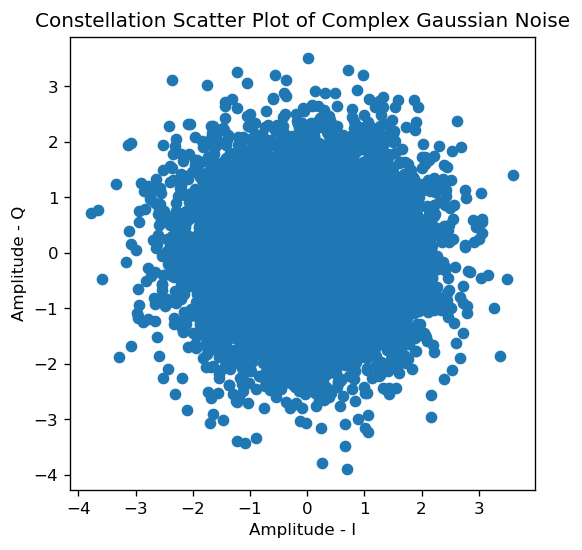

In [156]:
# Complex Gaussian Noise
z_c = np.random.normal(0,1,size=num_s) + 1j*np.random.normal(0,1,size=num_s);

# We'll look at the power of the signal and also plot it
power = (np.mean(np.abs(z_c**2))); # MS power
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(z_c),np.imag(z_c));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of Complex Gaussian Noise');

In most real life situations, the AWGN introduced by the channel usually has a fixed power. For simplicity of discussion, we will assume that the complex Gaussian noise has an RMS power of 1 throughout the following discussions.

In [161]:
# Complex Gaussian Noise, unit power
n_v = (np.random.normal(0,1,size=num_s) + 1j*np.random.normal(0,1,size=num_s))/np.sqrt(2);
power = (np.mean(np.abs(n_v**2)));
print("Mean Square Power = ",power)

Mean Square Power =  1.010022704046773


## Signals in AWGN


Now that we generated our noise, we are ready to see how it affects signals. Below is a code snippet that generates modulated symbols for some common schemes (BPSK, QPSK, 16QAM). We'll plot a scatter plot of the signal constellation and see how they look like without noise:

Mean Square Power =  0.9999999999999999


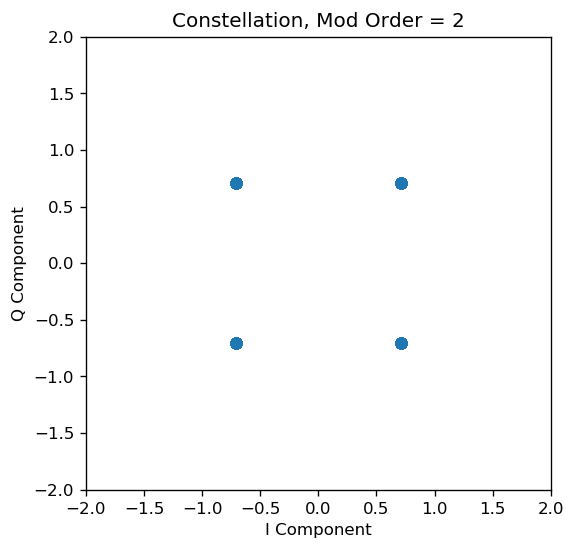

In [170]:
# Modulation order
mod_order = 2; # 1 for BPSK, 2 for QPSK or 4 for 16 QAM

# Number of bits (number of symbols is assumed fixed)
n_bits = num_s*mod_order;

# Generating random bits
bit_tx = numpy.random.randint(2, size=(n_bits,)) 

# Allocating space for the I and Q components
I_tx = np.zeros((int(num_s),),'complex');
Q_tx = np.zeros((int(num_s),),'complex');

# Modulation
if(mod_order == 4):
    # 16 QAM
    I_tx = 2*(bit_tx[::4] + 2*bit_tx[1::4] - 1.5)/np.sqrt(10);
    Q_tx = 2*(2*bit_tx[2::4] + bit_tx[3::4] - 1.5)/np.sqrt(10);
elif(mod_order == 2):
    # QPSK
    I_tx = (2*bit_tx[::2] - 1)/np.sqrt(2);
    Q_tx = (2*bit_tx[1::2] - 1)/np.sqrt(2);
elif(mod_order == 1):
    # BPSK
    I_tx = 2*bit_tx -1;

# Generating the transmit signal
sig_tx = I_tx + 1j*Q_tx;

power = (np.mean(np.abs(sig_tx**2)));
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(I_tx,Q_tx);
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Constellation, Mod Order = '+str(mod_order));

Note that in the above code snippet, the modulated signal is constrained to unit power. In practical situations, the transmit signal is of much higher power (more than a million times!) than the receive signal. Later, during our simulations, we'll multiply the transmit signal with a gain (equivalent to transmit gain). Now, let us look at how our unit power signal looks like in the presence of unit power noise. By the time the signal reaches the receiver, it undergoes a lot of attenuation due to the distance it has travelled (and multipath etc.). Assume transmit gain is $G_{tx}$ and the channel attenuation is $G_{a}$, then we can write:

```sig_rx = G_a*(G_tx*sig_tx) + n_v```

Where ```sig_rx``` is the received signal. Observe that the transmit gain and the channel attenuation play a major role in determining the strength of ```sig_tx``` as compared to ```n_v```.

To remove the channel gain effects and get back the original constellation, we remove the effects of ```G_tx``` and ```G_a```. Now our equations become:

```sig_rx_n = sig_tx + n_v/(G_a*G_tx)```

The power of the received signal divided by the power of noise is known as the signal to noise ratio (SNR). In this case the SNR is ```(G_a*G_a*G_tx*G_tx)``` (since noise power is 1).

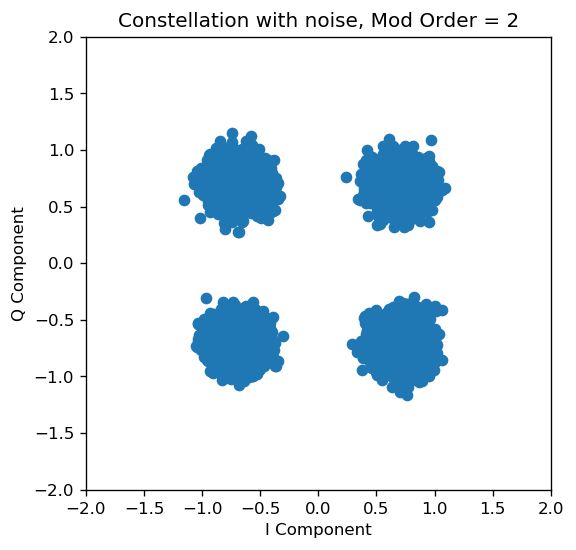

In [188]:
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 0.6e-2

sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Constellation with noise, Mod Order = '+str(mod_order));

Feel free to change the values of the modulation order and the gains to see how the received constellation changes.

## Demodulating the Transmitted Symbols


Now that we have our received constellation ```sig_rx_n```, the task of the receiver is to faithfully recover the symbols that were sent by the transmitter correctly. To understand how noise makes the receiver's job difficult, we go through the following exercise:

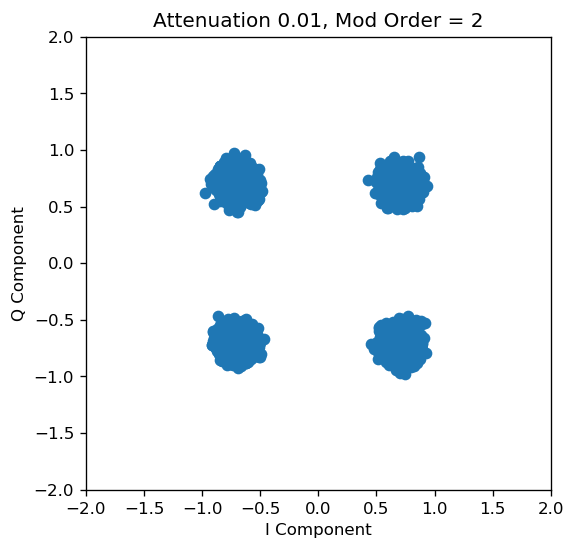

In [208]:
# CASE 1
# In this scenario, the transmit gain is fixed (Assume the transmitter is a fixed WiFi Access point for example)
# There is a clear line of sight path and the attenuation is just .01
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 1e-2;

sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Attenuation 0.01, Mod Order = '+str(mod_order));

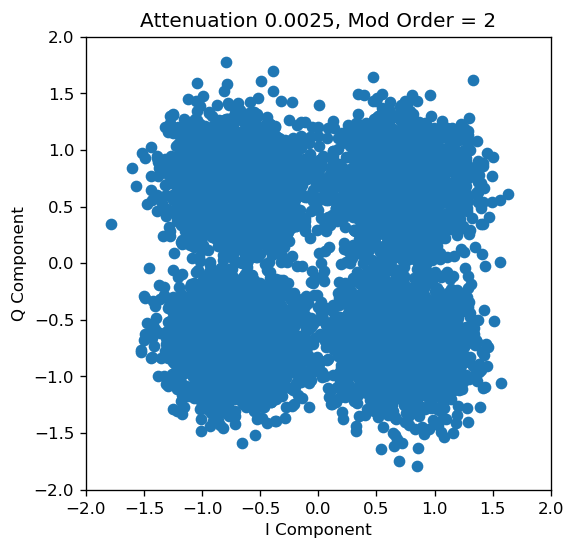

In [209]:
# CASE 2
# You now move to a different room, and the WiFi access point is now blocked by walls and other furniture
# The attenuation worsens to 0.0025
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 0.25*1e-2;

sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Attenuation 0.0025, Mod Order = '+str(mod_order));

Between CASE 1 and CASE 2, there is an obvious difference in how the receive constellation looks. In CASE 1, the receiver can just map each of the received points to the closest constellation point and recover the transmitted symbols without any error. It is clear that in CASE 1 there is very little ambiguity due to the large difference in signal and noise power. 

However, in CASE 2, if the receiver maps each point on the receive plot to the nearest point on the constellation, it will invariably end up making a few errors. The added noise has so much relative power, that it is making certain constellation points look like others, effectively corrupting some symbols.

A python code that performs demodulation and compares the transmit signal and the demodulated receive signal is presented below. If there is an error, it increments an error counter. After demodulating all the receive symbols, it gives an average error rate - the symbol error rate. The python code is wrapped in a function.

The symbol error rate is same as the BER for BPSK. If modulated carefully, it turns out that the symbol error rate for QPSK is also very close to the BER of QPSK modulation.

In [270]:
def ber_awgn(num_s_o,mod_s,rel_pow):
    # num_s_0 - Number of symbols
    # mod_s - Modulation order
    # rel_pow - (G_a*G_tx)
    num_s = num_s_o;
    mod_order = mod_s; # 1,2 or 4

    n_bits = num_s*mod_order;

    bit_tx = numpy.random.randint(2, size=(n_bits,)) 

    I_tx = np.zeros((int(num_s),),'complex');
    Q_tx = np.zeros((int(num_s),),'complex');

    # Modulation
    if(mod_order == 4):
        # 16 QAM
        I_tx = 2*(bit_tx[::4] + 2*bit_tx[1::4] - 1.5)/np.sqrt(10);
        Q_tx = 2*(2*bit_tx[2::4] + bit_tx[3::4] - 1.5)/np.sqrt(10);
    elif(mod_order == 2):
        # QPSK
        I_tx = (2*bit_tx[::2] - 1)/np.sqrt(2);
        Q_tx = (2*bit_tx[1::2] - 1)/np.sqrt(2);
    elif(mod_order == 1):
        # BPSK
        I_tx = 2*bit_tx -1;

    sig_tx = I_tx + 1j*Q_tx;
    
    n_v = (np.random.normal(0,1,size=num_s)+1j*np.random.normal(0,1,size=num_s))/np.sqrt(2);
    
    sig_rx_n = sig_tx + n_v/np.sqrt(rel_pow);
    
    I_rx = np.real(sig_rx_n);
    Q_rx = np.imag(sig_rx_n);

    num_err = 0;
    # Demodulation & error detection
    if(mod_order == 4):
        # 16 QAM
        # Left as exercise for reader
        return -1;
    elif(mod_order == 2):
        # QPSK    
        for i in range(0,num_s):
            flag2 = (Q_rx[i]*Q_tx[i]) < 0;
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1|flag2):
                num_err = num_err+1;
    elif(mod_order == 1):
        # BPSK
        for i in range(0,num_s):
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1):
                num_err = num_err+1;
                
    return float(num_err/num_s)


In [288]:
# BPSK
# SNR = 2
err_1 = ber_awgn(8192,1,2);
print(err_1);
# BPSK
# SNR = 3
err_2 = ber_awgn(8192,1,3);
print(err_2);
# QPSK
# SNR = 3
err_3 = ber_awgn(8192,2,3);
print(err_3);

0.02294921875
0.0068359375
0.087158203125


## BER Curves


In this section, we plot the BER curves for the modulation schemes under discussion for various SNRs.

In [293]:
# BER Curve for BPSK

snr_v = np.logspace(0,1,10);

ber_vec_bpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,1,snr);
    ber_vec_bpsk[j] = ber/250;
    j = j+1;

In [280]:
# BER Curve for QPSK

ber_vec_qpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,2,snr);
    ber_vec_qpsk[j] = ber/250;
    j = j+1;

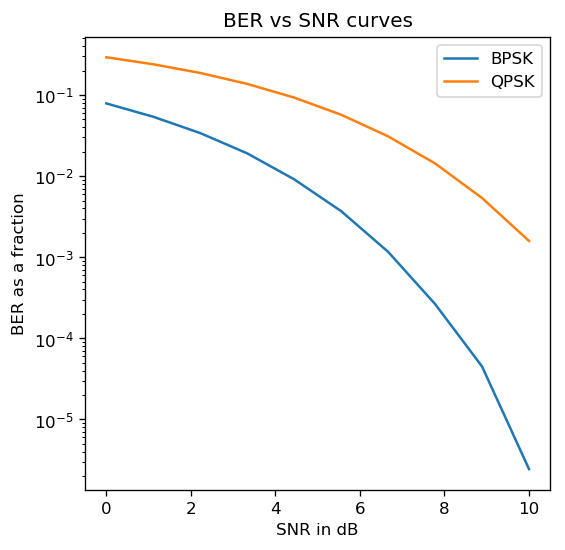

In [294]:
# Plotting the BER curves

fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.plot(10*np.log10(snr_v),ber_vec_bpsk);
plt.plot(10*np.log10(snr_v),ber_vec_qpsk);
plt.semilogy();
plt.title('BER vs SNR curves');
plt.xlabel('SNR in dB');
plt.ylabel('BER as a fraction');
plt.legend(['BPSK','QPSK']);

The above BER vs SNR curve is commonly known as the "Waterfall Plot" and shows that BER improves exponentially with increase in SNR.

## Exercises

### Q1

Write the demodulator and error estimator for the 16 QAM modulation scheme and plot its waterfall plot.

In [102]:
# Code for Q1

array([7.85170898e-02, 5.59628906e-02, 3.50346680e-02, 1.73813477e-02,
       5.67871094e-03, 8.14453125e-04, 1.41601563e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

### Q2

The symbol error rate of QPSK can be analytically computed as:

$$
P_{e}={\frac {1}{2}}\operatorname {erfc} \left({\sqrt {\frac {E_{b}}{N_{0}}}}\right)
$$

Where $\operatorname {erfc}$ is the complementory error function (see References).

The symbol error rate for QPSK can ve similarly analytically computed as:

$$
{ P_{ s }\approx erfc\left( { \sqrt { \frac { E_{ b } }{ N_{ 0 } }  }  } \right)  }
$$

In both the above equations $N_0$ is the power of noise. $E_{b}$ is interpreted as the "Energy per bit", which in our case will be the amount of power per each bit. $N_0$ is fixed to 1 in our examples. $E_b$ is signal power divided by the number of bits per symbol.

Armed with the above equations and the ```special.erfc()``` function, verify that the numerical simulations are consistent with the theory for both BPSK and QPSK.

In [295]:
# Code for Q2

## References

1. Phase Shift Keying, Wikipedia (url: https://en.wikipedia.org/wiki/Phase-shift_keying).
2. Complimentary Error Function, Wolfram MathWorld (url: http://mathworld.wolfram.com/Erfc.html).